<a href="https://colab.research.google.com/github/Bhavin52/Case_Study/blob/main/MultiLinear_regression_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
startUps = pd.read_csv("/content/50_Startups.csv")
startUps.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startUps=startUps.drop('State',axis=1)

In [4]:
startUps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [5]:
startUps.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


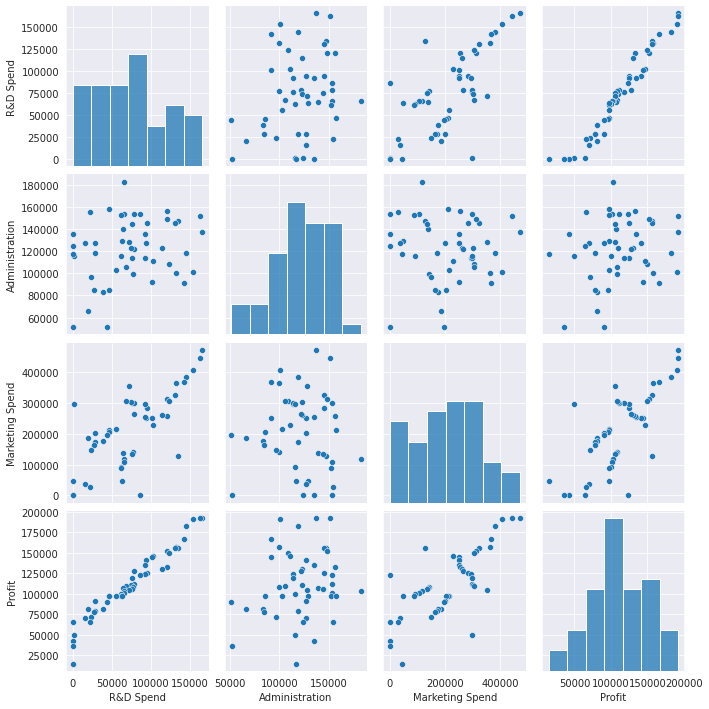

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(startUps)

In [7]:
startUps = pd.DataFrame(startUps)
startUps.rename(columns = {'R&D Spend':'research'}, inplace = True)
startUps.rename(columns = {'Marketing Spend':'Marketing'}, inplace = True)

print("\nAfter modifying first column:\n", startUps.columns)



After modifying first column:
 Index(['research', 'Administration', 'Marketing', 'Profit'], dtype='object')


In [19]:
import statsmodels.formula.api as smf 
model_0 = smf.ols('Profit~research+Administration+Marketing',data=startUps).fit() #Simple model without the transformation
model_1 = smf.ols('Profit~np.log(research+Administration+Marketing)',data=startUps).fit() #log transformation
model_2 = smf.ols('np.log(Profit)~research+Administration+Marketing',data=startUps).fit()  #exponential transformation
model_3 = smf.ols('Profit~np.sqrt(research+Administration+Marketing)',data=startUps).fit() #SQRT transformation 

In [ ]:
print("\nSimple model parameters:\n", model_0.params)
print("\nlog Transformation:\n", model_1.params)
print("\nExponential transformation:\n", model_2.params)
print("\nSQRT transformation:\n", model_3.params)


In [ ]:
print(model_0.tvalues, "\nSimple model parameters:\n", model_0.pvalues)#Administration and Marketing Is Influance our model
print(model_1.tvalues, "\nlog Transformation:\n", model_1.pvalues)
print(model_2.tvalues, "\nExponential transformation:\n", model_2.pvalues)
print(model_3.tvalues, "\nSQRT transformation:\n", model_3.pvalues)


In [28]:
print("\nSimple model parameters:\n",model_0.rsquared,model_0.rsquared_adj)
print("\nlog Transformation:\n",model_1.rsquared,model_1.rsquared_adj)
print("\nExponential transformation:\n",model_2.rsquared,model_2.rsquared_adj)
print("\nSQRT transformation:\n",model_3.rsquared,model_3.rsquared_adj)


Simple model parameters:
 0.9507459940683246 0.9475337762901719

log Transformation:
 0.668967613655554 0.6620711056067115

Exponential transformation:
 0.7617193422399918 0.7461792993426

SQRT transformation:
 0.7396453820962448 0.7342213275565832


In [29]:
simple_admin=smf.ols("Profit~Administration",data=startUps).fit()
simple_admin.tvalues , simple_admin.pvalues


(Intercept         3.040044
 Administration    1.419493
 dtype: float64, Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [30]:
simple_marketing=smf.ols("Profit~Marketing",data=startUps).fit()
simple_marketing.tvalues , simple_marketing.pvalues

(Intercept    7.808356
 Marketing    7.802657
 dtype: float64, Intercept    4.294735e-10
 Marketing    4.381073e-10
 dtype: float64)

In [31]:
multi_am=smf.ols("Profit~Marketing+Administration",data=startUps).fit()
multi_am.tvalues , multi_am.pvalues

(Intercept         1.142741
 Marketing         8.281039
 Administration    2.467779
 dtype: float64, Intercept         2.589341e-01
 Marketing         9.727245e-11
 Administration    1.729198e-02
 dtype: float64)

In [32]:
# Model Validation 
# 1)Collinearity check 2)Residual Analysis
 

In [33]:
# 1) Collinearity Problem Check
# formula VIF = 1/(1-Rsquare) for all independent variables

In [34]:
rsq_research=smf.ols("research~Administration+Marketing",data=startUps).fit().rsquared
vif_res=1/(1-rsq_research)

rsq_admin=smf.ols("Administration~research+Marketing",data=startUps).fit().rsquared
vif_admin=1/(1-rsq_admin)

rsq_marketing=smf.ols("Marketing~research+Administration",data=startUps).fit().rsquared
vif_marketing=1/(1-rsq_marketing)

d1 = {'Variables':['research','Administration','Marketing'],'VIF':[vif_res,vif_admin,vif_marketing]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

#no Independent variable has VIF>20 ,SO no collinarity consider all independent variables

,Variables,VIF
0,research,2.468903
1,Administration,1.175091
2,Marketing,2.326773


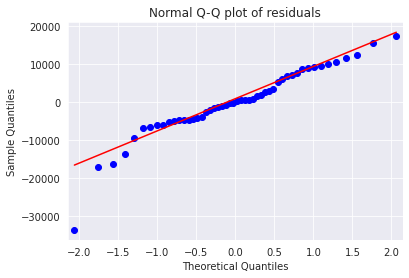

In [35]:
# Residual check
sm.qqplot(model_0.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
list(np.where(model_0.resid<-30000))

[array([49])]

In [37]:
  # Residual Analysis
  # Residual Plot for for Homoscedasticity
  


In [38]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

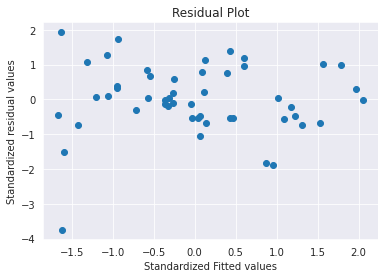

In [39]:
plt.scatter(get_standardized_values(model_0.fittedvalues),
            get_standardized_values(model_0.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [40]:
#Residual Vs Regressors

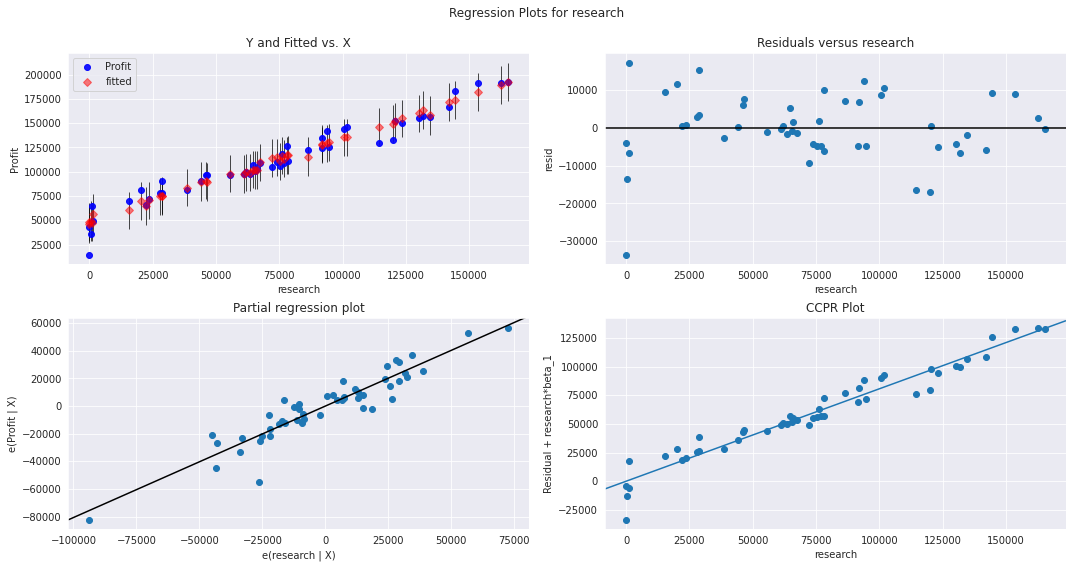

In [41]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_0, "research", fig=fig)
plt.show()

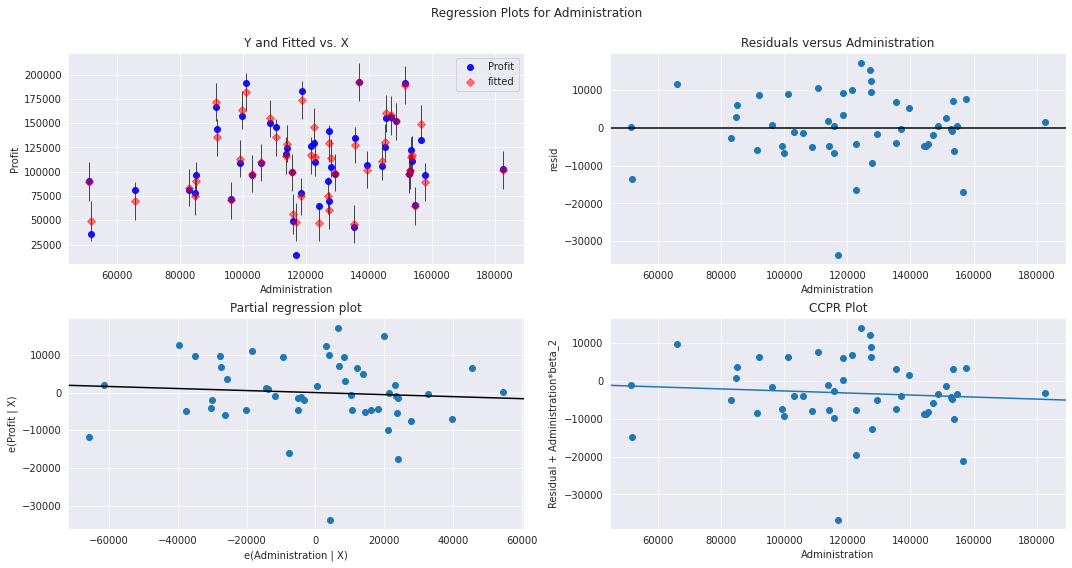

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_0, "Administration", fig=fig)
plt.show()


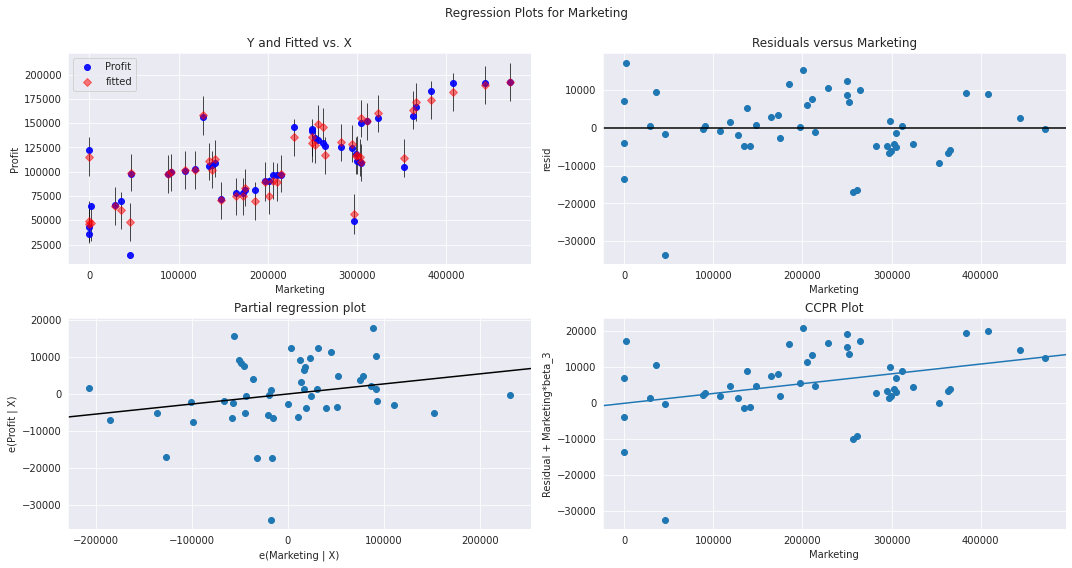

In [43]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_0, "Marketing", fig=fig)
plt.show()

In [44]:
#Model Deletion Diagnostics for checking Outliers and Influencers 
#two methods for this 
    #1)Cooks Distance if cooks distance is 1> then it is  Outliers

In [45]:
model_influence = model_0.get_influence()
(c, _) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


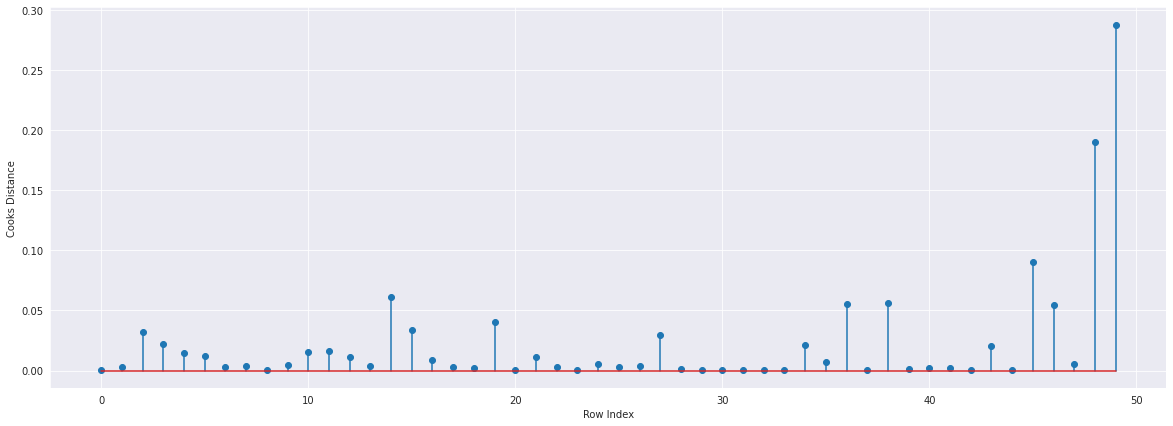

In [46]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startUps)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

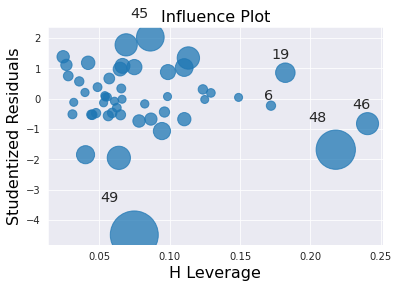

In [48]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_0)
plt.show()

In [49]:
k = startUps.shape[1]
n = startUps.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff


0.30000000000000004

In [50]:
startUps[startUps.index.isin([49])] 

,research,Administration,Marketing,Profit
49,0.0,116983.8,45173.06,14681.4


In [51]:
#Improving the model
startUps=startUps.drop(startUps.index[[49]],axis=0).reset_index(drop=True) 

In [52]:
model_final = smf.ols('Profit~research+Administration+Marketing',data=startUps).fit()

In [53]:
(model_final.rsquared,model_final.rsquared_adj)

(0.9613162435129848, 0.9587373264138505)

In [55]:
compare={'Prep_Models':['Model','Final_Model'],'Rsquared':[model_0.rsquared,model_final.rsquared]}
table=pd.DataFrame(compare)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
